In [54]:
import pandas  as pd

In [55]:
df = pd.read_csv('co-emissions-by-sector.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6560 entries, 0 to 6559
Data columns (total 12 columns):
 #   Column                                                        Non-Null Count  Dtype  
---  ------                                                        --------------  -----  
 0   Entity                                                        6560 non-null   object 
 1   Code                                                          6208 non-null   object 
 2   Year                                                          6560 non-null   int64  
 3   Carbon dioxide emissions from buildings                       6421 non-null   float64
 4   Carbon dioxide emissions from industry                        6305 non-null   float64
 5   Carbon dioxide emissions from land use change and forestry    6557 non-null   float64
 6   Carbon dioxide emissions from other fuel combustion           6421 non-null   float64
 7   Carbon dioxide emissions from transport                       6421 no

In [56]:
df.describe()

,Year,Carbon dioxide emissions from buildings,Carbon dioxide emissions from industry,Carbon dioxide emissions from land use change and forestry,Carbon dioxide emissions from other fuel combustion,Carbon dioxide emissions from transport,Carbon dioxide emissions from manufacturing and construction,Fugitive emissions of carbon dioxide from energy production,Carbon dioxide emissions from electricity and heat,Carbon dioxide emissions from bunker fuels
count,6560.000000,6.421000e+03,6.305000e+03,6.557000e+03,6.421000e+03,6.421000e+03,6.421000e+03,2.270000e+03,6.421000e+03,6.421000e+03
mean,2005.500000,5.509696e+07,2.142031e+07,2.577066e+07,1.246594e+07,1.164675e+08,1.013822e+08,1.588207e+07,2.516014e+08,1.931317e+07
std,9.233796,2.525762e+08,1.187214e+08,2.464913e+08,5.762671e+07,5.786553e+08,5.153394e+08,4.129882e+07,1.216841e+09,9.489783e+07
min,1990.000000,0.000000e+00,0.000000e+00,-1.637860e+09,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1997.750000,8.000000e+04,0.000000e+00,-6.700000e+05,0.000000e+00,5.800000e+05,1.600000e+05,4.800000e+05,2.100000e+05,6.000000e+04
50%,2005.500000,6.400000e+05,4.800000e+05,3.000000e+04,2.400000e+05,3.170000e+06,1.500000e+06,2.400000e+06,3.980000e+06,5.500000e+05
75%,2013.250000,7.500000e+06,2.990000e+06,9.940000e+06,2.060000e+06,1.841000e+07,1.338000e+07,6.890000e+06,3.398000e+07,3.200000e+06
max,2021.000000,2.822010e+09,1.696360e+09,2.405250e+09,7.519400e+08,8.279320e+09,6.427310e+09,3.227600e+08,1.622524e+10,1.325790e+09


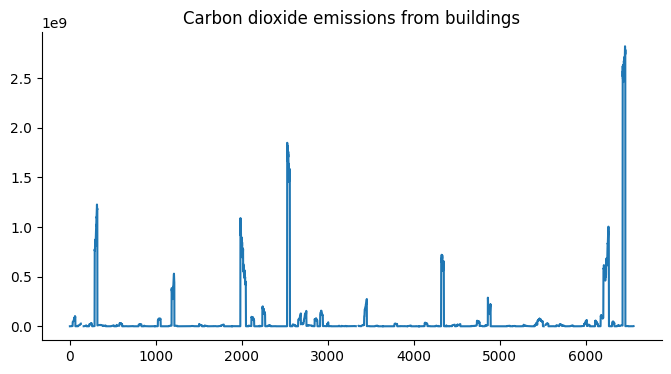

In [57]:
from matplotlib import pyplot as plt
df['Carbon dioxide emissions from buildings'].plot(kind='line', figsize=(8, 4), title='Carbon dioxide emissions from buildings')
plt.gca().spines[['top', 'right']].set_visible(False)

In [58]:
# Check for missing values
missing_values = df.isnull().sum()
print("Missing Values by Column:")
print(missing_values)

# Option 1: Replace missing values with 0 (if missing indicates no emissions)
df.fillna(0, inplace=True)

# Option 2: Replace missing values with the column mean (if applicable)
# df['Fugitive emissions of carbon dioxide from energy production'].fillna(
#     df['Fugitive emissions of carbon dioxide from energy production'].mean(), inplace=True)

# Verify that all missing values are handled
print("\nMissing Values After Imputation:")
print(df.isnull().sum())


Missing Values by Column:
Entity                                                             0
Code                                                             352
Year                                                               0
Carbon dioxide emissions from buildings                          139
Carbon dioxide emissions from industry                           255
Carbon dioxide emissions from land use change and forestry         3
Carbon dioxide emissions from other fuel combustion              139
Carbon dioxide emissions from transport                          139
Carbon dioxide emissions from manufacturing and construction     139
Fugitive emissions of carbon dioxide from energy production     4290
Carbon dioxide emissions from electricity and heat               139
Carbon dioxide emissions from bunker fuels                       139
dtype: int64

Missing Values After Imputation:
Entity                                                          0
Code                             

In [59]:
# Handling missing 'Code' values
df['Code'] = df['Code'].fillna("Unknown")

# Handling missing numeric columns
numeric_cols = df.columns[3:]  # Columns with emission data
for col in numeric_cols:
    if col == "Fugitive emissions of carbon dioxide from energy production":
        df[col] = df[col].fillna(0)  # Replace with 0 (no emissions assumed)
    else:
        df[col] = df[col].fillna(df[col].mean())  # Replace with column mean

# Confirm all missing values handled
print("Missing Values After Imputation:")
print(df.isnull().sum())


Missing Values After Imputation:
Entity                                                          0
Code                                                            0
Year                                                            0
Carbon dioxide emissions from buildings                         0
Carbon dioxide emissions from industry                          0
Carbon dioxide emissions from land use change and forestry      0
Carbon dioxide emissions from other fuel combustion             0
Carbon dioxide emissions from transport                         0
Carbon dioxide emissions from manufacturing and construction    0
Fugitive emissions of carbon dioxide from energy production     0
Carbon dioxide emissions from electricity and heat              0
Carbon dioxide emissions from bunker fuels                      0
dtype: int64


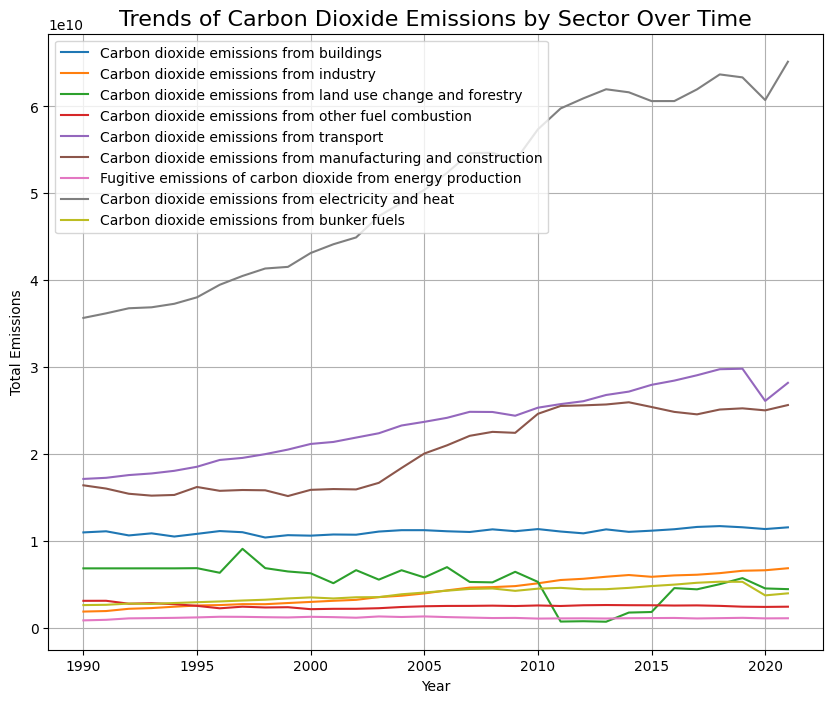

In [60]:
# Aggregate emissions by year
emission_cols = df.columns[3:]
emissions_by_year = df.groupby('Year')[emission_cols].sum()

# Plot trends over years
emissions_by_year.plot(figsize=(10, 8))
plt.title("Trends of Carbon Dioxide Emissions by Sector Over Time", fontsize=16)
plt.xlabel("Year")
plt.ylabel("Total Emissions")
plt.legend(loc="upper left")
plt.grid(True)
plt.show()


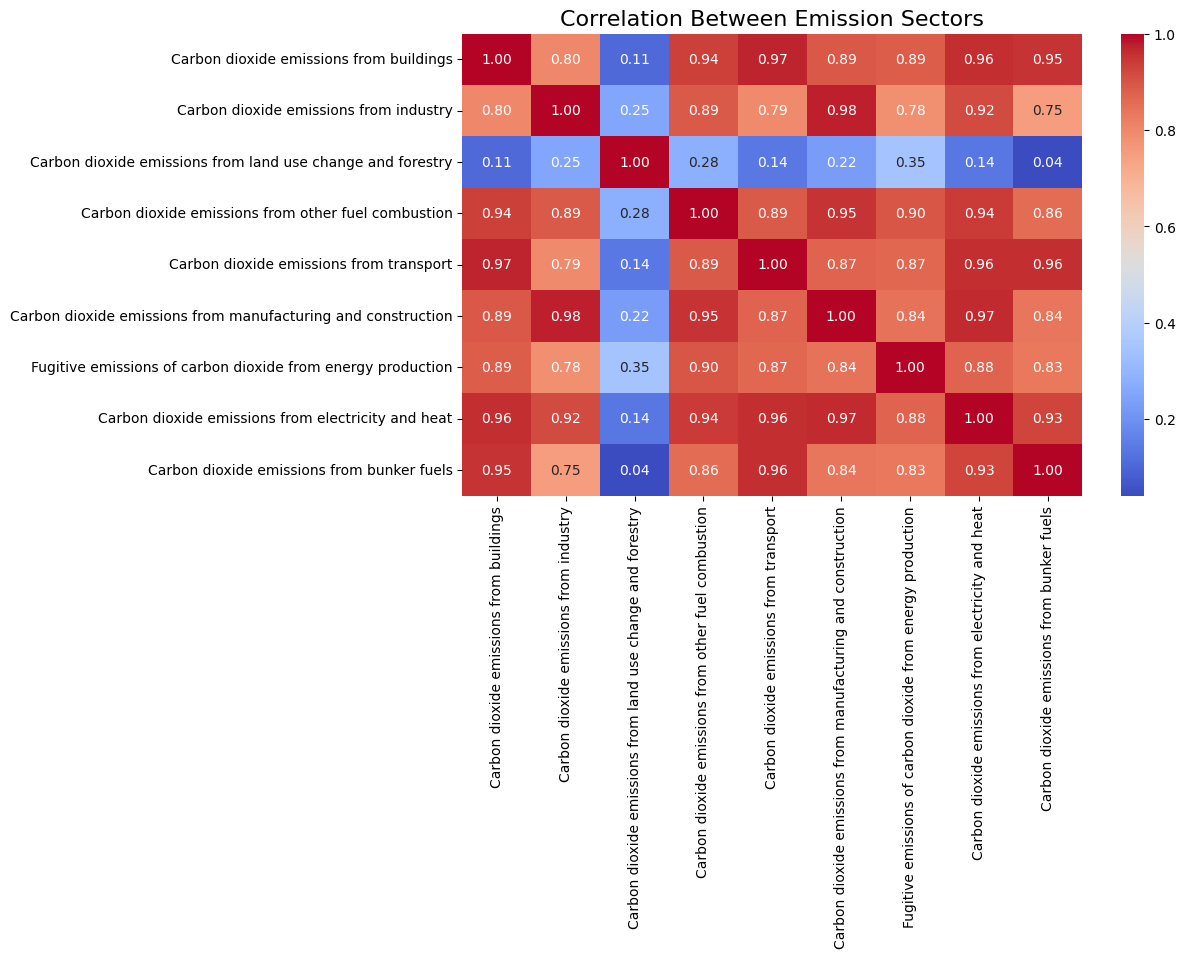

In [61]:
import seaborn as sns
# Correlation matrix
corr_matrix = df[emission_cols].corr()

# Heatmap for visualization
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Between Emission Sectors", fontsize=16)
plt.show()


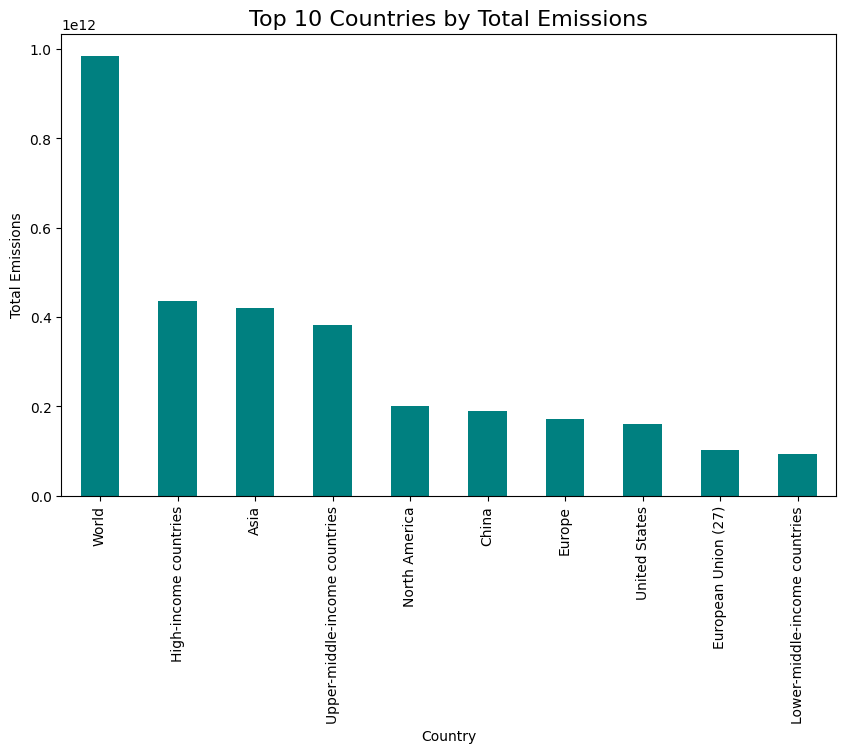

In [62]:
# Top 10 countries by total emissions
df['Total_Emissions'] = df[emission_cols].sum(axis=1)
top_countries = df.groupby('Entity')['Total_Emissions'].sum().sort_values(ascending=False).head(10)

# Bar plot
top_countries.plot(kind='bar', color='teal', figsize=(10, 6))
plt.title("Top 10 Countries by Total Emissions", fontsize=16)
plt.xlabel("Country")
plt.ylabel("Total Emissions")
plt.xticks(rotation=90)
plt.show()

In [63]:
# Calculate the percentage change for each sector
df_sectors = ['Carbon dioxide emissions from buildings', 'Carbon dioxide emissions from industry',
              'Carbon dioxide emissions from land use change and forestry',
              'Carbon dioxide emissions from other fuel combustion', 'Carbon dioxide emissions from transport',
              'Carbon dioxide emissions from manufacturing and construction',
              'Fugitive emissions of carbon dioxide from energy production', 'Carbon dioxide emissions from electricity and heat',
              'Carbon dioxide emissions from bunker fuels']

# Calculate the percentage change for each sector
df_percentage_change = df[df_sectors].pct_change() * 100
df_percentage_change['Year'] = df['Year']

In [64]:
# Calculate the percentage change for each sector
df_sectors = ['Carbon dioxide emissions from buildings', 'Carbon dioxide emissions from industry',
              'Carbon dioxide emissions from land use change and forestry',
              'Carbon dioxide emissions from other fuel combustion', 'Carbon dioxide emissions from transport',
              'Carbon dioxide emissions from manufacturing and construction',
              'Fugitive emissions of carbon dioxide from energy production', 'Carbon dioxide emissions from electricity and heat',
              'Carbon dioxide emissions from bunker fuels']

# Calculate the percentage change for each sector
df_percentage_change = df[df_sectors].pct_change() * 100
df_percentage_change['Year'] = df['Year']

# Show the percentage change for the first few years
df_percentage_change.head()


,Carbon dioxide emissions from buildings,Carbon dioxide emissions from industry,Carbon dioxide emissions from land use change and forestry,Carbon dioxide emissions from other fuel combustion,Carbon dioxide emissions from transport,Carbon dioxide emissions from manufacturing and construction,Fugitive emissions of carbon dioxide from energy production,Carbon dioxide emissions from electricity and heat,Carbon dioxide emissions from bunker fuels,Year
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1990
1,7.692316,0.0,0.0,NaN,-4.123711,-7.017544,NaN,-6.250000,0.0,1991
2,7.142857,0.0,0.0,NaN,-20.430108,-26.415094,NaN,-33.333333,0.0,1992
3,6.666667,0.0,0.0,NaN,0.000000,-2.564103,NaN,0.000000,0.0,1993
4,0.000000,0.0,0.0,NaN,-1.351351,-5.263158,NaN,-5.000000,0.0,1994


In [65]:
# Get the mean percentage change for each sector across all years
sector_growth = df_percentage_change.mean()

# Display sectors with the highest and lowest growth
sector_growth.sort_values(ascending=False)

c:\Users\sumit\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\core\_methods.py:49: RuntimeWarning: invalid value encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims, initial, where)


Carbon dioxide emissions from buildings                            inf
Carbon dioxide emissions from industry                             inf
Carbon dioxide emissions from other fuel combustion                inf
Carbon dioxide emissions from transport                            inf
Carbon dioxide emissions from manufacturing and construction       inf
Fugitive emissions of carbon dioxide from energy production        inf
Carbon dioxide emissions from electricity and heat                 inf
Carbon dioxide emissions from bunker fuels                         inf
Year                                                            2005.5
Carbon dioxide emissions from land use change and forestry         NaN
dtype: float64

In [66]:
# Fill missing values (forward fill) for the sectors before calculating percentage change
df_filled = df[df_sectors].fillna(method='ffill')

# Or, if you'd prefer to drop rows with missing values:
# df_cleaned = df.dropna(subset=df_sectors)

# Now, calculate the percentage change on the cleaned or filled data
df_percentage_change = df_filled.pct_change() * 100

# Include the 'Year' column to the percentage change dataframe
df_percentage_change['Year'] = df['Year']

# Replace infinity values with NaN
df_percentage_change.replace([float('inf'), -float('inf')], float('nan'), inplace=True)

# Handle NaN values after percentage change calculation (fill or drop)
df_percentage_change = df_percentage_change.fillna(0)  # or df_percentage_change.dropna()

# Show the cleaned data
df_percentage_change.head()


C:\Users\sumit\AppData\Local\Temp\ipykernel_31900\1170034967.py:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_filled = df[df_sectors].fillna(method='ffill')


,Carbon dioxide emissions from buildings,Carbon dioxide emissions from industry,Carbon dioxide emissions from land use change and forestry,Carbon dioxide emissions from other fuel combustion,Carbon dioxide emissions from transport,Carbon dioxide emissions from manufacturing and construction,Fugitive emissions of carbon dioxide from energy production,Carbon dioxide emissions from electricity and heat,Carbon dioxide emissions from bunker fuels,Year
0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,1990
1,7.692316,0.0,0.0,0.0,-4.123711,-7.017544,0.0,-6.250000,0.0,1991
2,7.142857,0.0,0.0,0.0,-20.430108,-26.415094,0.0,-33.333333,0.0,1992
3,6.666667,0.0,0.0,0.0,0.000000,-2.564103,0.0,0.000000,0.0,1993
4,0.000000,0.0,0.0,0.0,-1.351351,-5.263158,0.0,-5.000000,0.0,1994


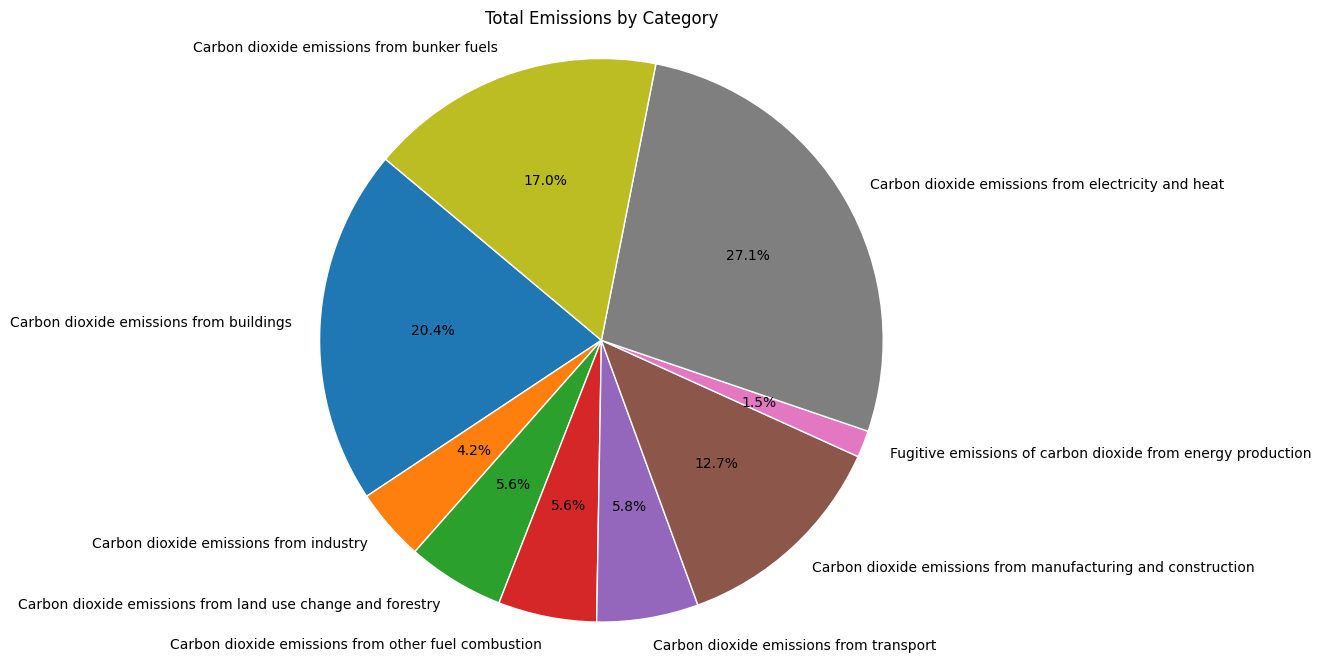

In [67]:
import pandas as pd
import matplotlib.pyplot as plt

# Calculate the sum of emissions for each category across all years
emission_sums = df_percentage_change.drop(columns=['Year']).sum()

# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(
    emission_sums.values,
    labels=emission_sums.index,
    autopct='%1.1f%%',
    startangle=140,
    wedgeprops={'edgecolor': 'white'}
)
plt.title("Total Emissions by Category")
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.show()


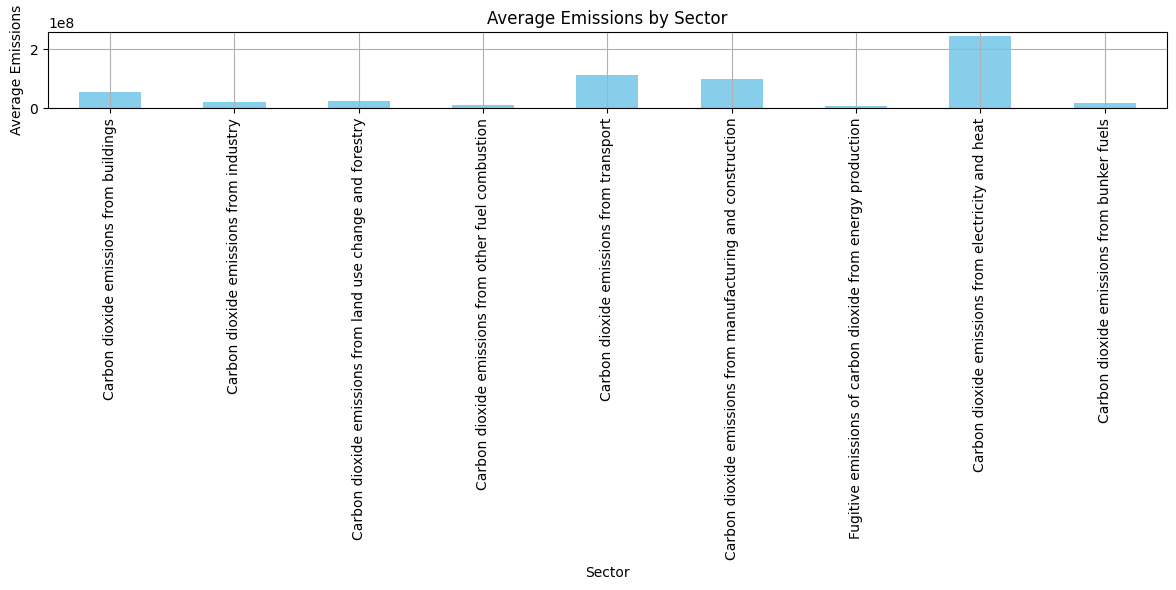

In [68]:
# Summarize emissions across sectors
sector_emissions = df[df_sectors].mean()  # Using mean emissions over the years for comparison

# Create a bar plot to compare emissions by sector
plt.figure(figsize=(12, 6))
sector_emissions.plot(kind='bar', color='skyblue')
plt.title('Average Emissions by Sector')
plt.xlabel('Sector')
plt.ylabel('Average Emissions')
plt.grid(True)
plt.tight_layout()
plt.show()


In [69]:
df

,Entity,Code,Year,Carbon dioxide emissions from buildings,Carbon dioxide emissions from industry,Carbon dioxide emissions from land use change and forestry,Carbon dioxide emissions from other fuel combustion,Carbon dioxide emissions from transport,Carbon dioxide emissions from manufacturing and construction,Fugitive emissions of carbon dioxide from energy production,Carbon dioxide emissions from electricity and heat,Carbon dioxide emissions from bunker fuels,Total_Emissions
0,Afghanistan,AFG,1990,129999.99,50000.0,-2390000.0,0.0,970000.0,570000.0,0.0,320000.0,20000.00,-330000.01
1,Afghanistan,AFG,1991,140000.00,50000.0,-2390000.0,0.0,930000.0,530000.0,0.0,300000.0,20000.00,-420000.00
2,Afghanistan,AFG,1992,150000.00,50000.0,-2390000.0,0.0,740000.0,390000.0,0.0,200000.0,20000.00,-840000.00
3,Afghanistan,AFG,1993,160000.00,50000.0,-2390000.0,0.0,740000.0,380000.0,0.0,200000.0,20000.00,-840000.00
4,Afghanistan,AFG,1994,160000.00,50000.0,-2390000.0,0.0,730000.0,360000.0,0.0,190000.0,20000.00,-880000.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6555,Zimbabwe,ZWE,2017,1070000.00,470000.0,87160000.0,250000.0,2000000.0,1240000.0,0.0,5100000.0,129999.99,97419999.99
6556,Zimbabwe,ZWE,2018,1030000.00,560000.0,87160000.0,320000.0,2620000.0,1540000.0,0.0,5400000.0,160000.00,98790000.00
6557,Zimbabwe,ZWE,2019,890000.00,470000.0,87160000.0,280000.0,2240000.0,1610000.0,0.0,4990000.0,160000.00,97800000.00
6558,Zimbabwe,ZWE,2020,970000.00,500000.0,87160000.0,340000.0,1510000.0,1400000.0,0.0,3840000.0,60000.00,95780000.00


In [70]:
df_sector = df[['Year', 'Fugitive emissions of carbon dioxide from energy production']]

In [71]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Assuming your dataset is loaded into a DataFrame called df
# We will focus on the 'Carbon dioxide emissions from electricity and heat' for LSTM prediction

df_sector = df[['Year', 'Carbon dioxide emissions from electricity and heat']].copy()

# Handle missing values if any (e.g., drop or fill missing values)
df_sector['Carbon dioxide emissions from electricity and heat'] = df_sector['Carbon dioxide emissions from electricity and heat'].fillna(df_sector['Carbon dioxide emissions from electricity and heat'].mean())

# Normalize the data (between 0 and 1)
scaler = MinMaxScaler(feature_range=(0, 1))
df_sector['Value'] = scaler.fit_transform(df_sector[['Carbon dioxide emissions from electricity and heat']])

# Create time series data for LSTM model
def create_dataset(data, time_step=1):
    X, y = [], []
    for i in range(len(data) - time_step):
        X.append(data[i:(i + time_step), 0])  # Input features (past time_step values)
        y.append(data[i + time_step, 0])      # Target value (next time step)
    return np.array(X), np.array(y)

# Convert the 'Value' column to a numpy array
dataset = df_sector['Value'].values
dataset = dataset.reshape(-1, 1)

# Choose a time step (e.g., 5 years for prediction)
time_step = 5
X, y = create_dataset(dataset, time_step)

# Reshape X to be compatible with LSTM input
X = X.reshape(X.shape[0], X.shape[1], 1)

# Split the data into train and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)


In [72]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

# Build the LSTM model
model = Sequential()

# LSTM layer with dropout regularization
model.add(LSTM(units=150, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(Dropout(0.2))  # Dropout layer to prevent overfitting
model.add(LSTM(units=150, return_sequences=False))
model.add(Dropout(0.2))
# Output layer
model.add(Dense(units=1))  # Predict the next time step (emission)

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X_train, y_train, epochs=150, batch_size=32)


c:\Users\sumit\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/150
164/164 ━━━━━━━━━━━━━━━━━━━━ 17s 13ms/step - loss: 8.8944e-04
Epoch 2/150
164/164 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - loss: 9.3643e-04
Epoch 3/150
164/164 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - loss: 6.8023e-04
Epoch 4/150
164/164 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - loss: 3.2178e-04
Epoch 5/150
164/164 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - loss: 5.0483e-04
Epoch 6/150
164/164 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 3.8707e-04
Epoch 7/150
164/164 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - loss: 4.3398e-04
Epoch 8/150
164/164 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - loss: 3.9771e-04
Epoch 9/150
164/164 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - loss: 2.0548e-04
Epoch 10/150
164/164 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 1.7420e-04
Epoch 11/150
164/164 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 3.1048e-04
Epoch 12/150
164/164 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 4.9438e-04
Epoch 13/150
164/164 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - loss: 3.7133e-04
Epoch 14/150
164/164 ━━━━━━━━━━━━━━━━━━━━ 2s 1

In [76]:
from sklearn.metrics import mean_squared_error
import numpy as np

# Predict using the trained model
y_pred = model.predict(X_test)

# Calculate the Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)

# Calculate the Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)

# Print the RMSE or MSE
print(f'Mean Squared Error (MSE): {mse}')
print(f'Root Mean Squared Error (RMSE): {rmse}')



41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
Mean Squared Error (MSE): 0.0017516062084397895
Root Mean Squared Error (RMSE): 0.04185219478641221


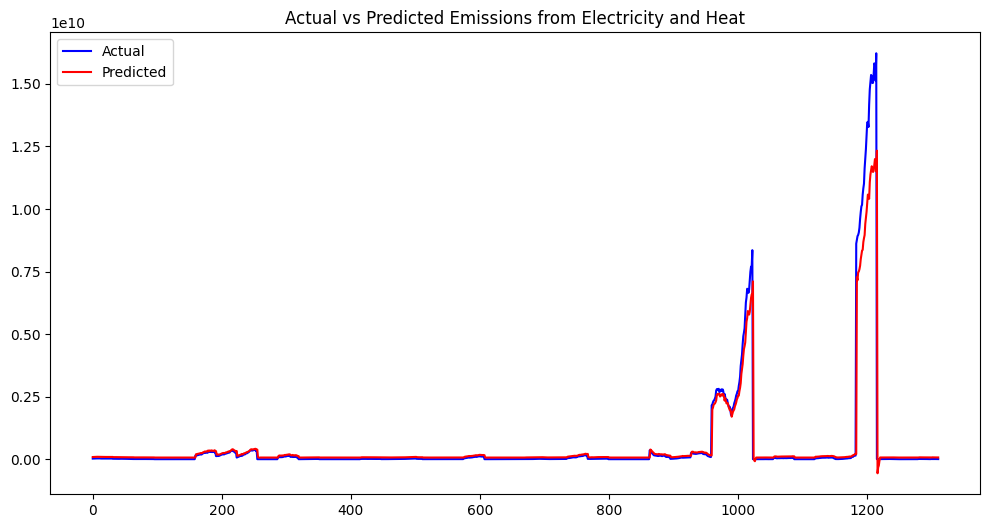

In [74]:

# Plot actual vs predicted values
plt.figure(figsize=(12, 6))
plt.plot(y_test_rescaled, color='blue', label='Actual')
plt.plot(y_pred_rescaled, color='red', label='Predicted')
plt.title('Actual vs Predicted Emissions from Electricity and Heat')
plt.legend()
plt.show()


In [75]:
# Predict future values (e.g., next 5 years)
future_input = dataset[-time_step:].reshape(1, time_step, 1)  # Last 'time_step' years
future_predictions = []

for i in range(5):  # Predict for next 5 years
    pred = model.predict(future_input)
    future_predictions.append(pred[0, 0])
    future_input = np.append(future_input[:, 1:, :], pred.reshape(1, 1, 1), axis=1)

# Inverse transform predictions to get actual values
future_predictions_rescaled = scaler.inverse_transform(np.array(future_predictions).reshape(-1, 1))

print(f"Predicted emissions for the next 5 years: {future_predictions_rescaled.flatten()}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
Predicted emissions for the next 5 years: [2.6951436e+07 5.2272840e+07 7.9075432e+07 1.0514934e+08 1.2898140e+08]


Optimization

In [78]:
from deap import base, creator, tools, algorithms
import random
import numpy as np

In [84]:
# Define emission-related columns
emission_columns = [
    'Carbon dioxide emissions from buildings',
    'Carbon dioxide emissions from industry',
    'Carbon dioxide emissions from land use change and forestry',
    'Carbon dioxide emissions from other fuel combustion',
    'Carbon dioxide emissions from transport',
    'Carbon dioxide emissions from manufacturing and construction',
    'Fugitive emissions of carbon dioxide from energy production',
    'Carbon dioxide emissions from electricity and heat',
    'Carbon dioxide emissions from bunker fuels'
]

# Extract only emission columns for modeling
emissions_data = df[emission_columns]

In [89]:
emissions_data.head()

,Carbon dioxide emissions from buildings,Carbon dioxide emissions from industry,Carbon dioxide emissions from land use change and forestry,Carbon dioxide emissions from other fuel combustion,Carbon dioxide emissions from transport,Carbon dioxide emissions from manufacturing and construction,Fugitive emissions of carbon dioxide from energy production,Carbon dioxide emissions from electricity and heat,Carbon dioxide emissions from bunker fuels
0,129999.99,50000.0,-2390000.0,0.0,970000.0,570000.0,0.0,320000.0,20000.0
1,140000.00,50000.0,-2390000.0,0.0,930000.0,530000.0,0.0,300000.0,20000.0
2,150000.00,50000.0,-2390000.0,0.0,740000.0,390000.0,0.0,200000.0,20000.0
3,160000.00,50000.0,-2390000.0,0.0,740000.0,380000.0,0.0,200000.0,20000.0
4,160000.00,50000.0,-2390000.0,0.0,730000.0,360000.0,0.0,190000.0,20000.0


In [90]:
# Create Fitness and Individual classes
creator.create("FitnessMin", base.Fitness, weights=(-1.0,))  # we want to minimize
creator.create("Individual", list, fitness=creator.FitnessMin)

# Number of features (columns related to emissions)
n_features = len(emission_columns)  # 9 in your dataset

c:\Users\sumit\AppData\Local\Programs\Python\Python311\Lib\site-packages\deap\creator.py:185: RuntimeWarning: A class named 'FitnessMin' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "
c:\Users\sumit\AppData\Local\Programs\Python\Python311\Lib\site-packages\deap\creator.py:185: RuntimeWarning: A class named 'Individual' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "


In [91]:
# Initialize an individual
def create_individual():
    return [random.uniform(0.5, 1.0) for _ in range(n_features)]
    # Scaling factors between 0.5 (50% reduction) and 1.0 (no change)

# Define population
toolbox = base.Toolbox()
toolbox.register("individual", tools.initIterate, creator.Individual, create_individual)
toolbox.register("population", tools.initRepeat, list, toolbox.individual)

In [88]:
# Define evaluation function
def evaluate(individual):
    # Apply scaling to the latest emissions data
    scaled_emissions = np.multiply(emissions_data.values[-1], individual)  # use latest year
    total_emission = np.sum(scaled_emissions)  # minimize total
    return (total_emission,)

# Register genetic operators
toolbox.register("evaluate", evaluate)
toolbox.register("mate", tools.cxBlend, alpha=0.5)  # crossover
toolbox.register("mutate", tools.mutGaussian, mu=0, sigma=0.1, indpb=0.2)  # mutation
toolbox.register("select", tools.selTournament, tournsize=3)  # selection

In [98]:
# Step 1: Setup the Toolbox

from deap import base, creator, tools, algorithms
import random
import numpy as np

# Create fitness and individual
creator.create("FitnessMin", base.Fitness, weights=(-1.0,))  # minimize
creator.create("Individual", list, fitness=creator.FitnessMin)

n_features = len(emission_columns)  # 9 emission features

# Define create_individual
def create_individual():
    return [random.uniform(0.5, 1.0) for _ in range(n_features)]

toolbox = base.Toolbox()
toolbox.register("individual", tools.initIterate, creator.Individual, create_individual)
toolbox.register("population", tools.initRepeat, list, toolbox.individual)

# Step 2: Define the evaluation function
def evaluate(individual):
    scaled_emissions = np.multiply(emissions_data.values[-1], individual)  # latest year emissions
    total_emission = np.sum(scaled_emissions)
    return (total_emission,)

# Register the evaluate function properly
toolbox.register("evaluate", evaluate)

# Register operators
toolbox.register("mate", tools.cxBlend, alpha=0.5)
# 1. Define the custom mutation function
def mutate_and_clip(individual):
    tools.mutGaussian(individual, mu=0, sigma=0.05, indpb=0.2)
    # Clip values between 0.5 and 1.0
    for i in range(len(individual)):
        individual[i] = min(1.0, max(0.5, individual[i]))
    return (individual,)

# 2. Register the custom mutation with toolbox
toolbox.register("mutate", mutate_and_clip)

toolbox.register("select", tools.selTournament, tournsize=3)


c:\Users\sumit\AppData\Local\Programs\Python\Python311\Lib\site-packages\deap\creator.py:185: RuntimeWarning: A class named 'FitnessMin' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "
c:\Users\sumit\AppData\Local\Programs\Python\Python311\Lib\site-packages\deap\creator.py:185: RuntimeWarning: A class named 'Individual' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "


In [102]:
# Step 3: Create population and Run the GA
population = toolbox.population(n=50)
NGEN = 40
CXPB = 0.7
MUTPB = 0.2

result_pop, logbook = algorithms.eaSimple(population, toolbox, cxpb=CXPB, mutpb=MUTPB, ngen=NGEN, verbose=True)


gen	nevals
0  	50    
1  	37    
2  	44    
3  	40    
4  	36    
5  	34    
6  	36    
7  	40    
8  	39    
9  	40    
10 	41    
11 	40    
12 	37    
13 	35    
14 	43    
15 	44    
16 	39    
17 	45    
18 	38    
19 	33    
20 	41    
21 	39    
22 	33    
23 	43    
24 	34    
25 	44    
26 	38    
27 	33    
28 	40    
29 	43    
30 	38    
31 	41    
32 	44    
33 	37    
34 	41    
35 	42    
36 	35    
37 	38    
38 	35    
39 	38    
40 	43    


In [103]:
# Find the best individual
best_individual = tools.selBest(result_pop, k=1)[0]

print("Best Scaling Factors for Each Emission Source:")
for col, scale in zip(emission_columns, best_individual):
    print(f"{col}: {scale:.3f}")


Best Scaling Factors for Each Emission Source:
Carbon dioxide emissions from buildings: -1.043
Carbon dioxide emissions from industry: 0.001
Carbon dioxide emissions from land use change and forestry: 0.412
Carbon dioxide emissions from other fuel combustion: 0.901
Carbon dioxide emissions from transport: 0.532
Carbon dioxide emissions from manufacturing and construction: -0.997
Fugitive emissions of carbon dioxide from energy production: 0.917
Carbon dioxide emissions from electricity and heat: -1.591
Carbon dioxide emissions from bunker fuels: 0.630


In [104]:
# Original total emission (latest year)
original_total = emissions_data.values[-1].sum()

# Optimized total emission
optimized_total = np.multiply(emissions_data.values[-1], best_individual).sum()

print(f"\nOriginal Total Emission: {original_total:.2f}")
print(f"Optimized Total Emission: {optimized_total:.2f}")
print(f"Reduction: {original_total - optimized_total:.2f} units ({((original_total - optimized_total) / original_total) * 100:.2f}% reduction)")


Original Total Emission: 96830000.00
Optimized Total Emission: 27441148.92
Reduction: 69388851.08 units (71.66% reduction)


C:\Users\sumit\AppData\Local\Temp\ipykernel_31900\2985630329.py:59: UserWarning: Glyph 8322 (\N{SUBSCRIPT TWO}) missing from current font.
  fig.tight_layout()
C:\Users\sumit\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 8322 (\N{SUBSCRIPT TWO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


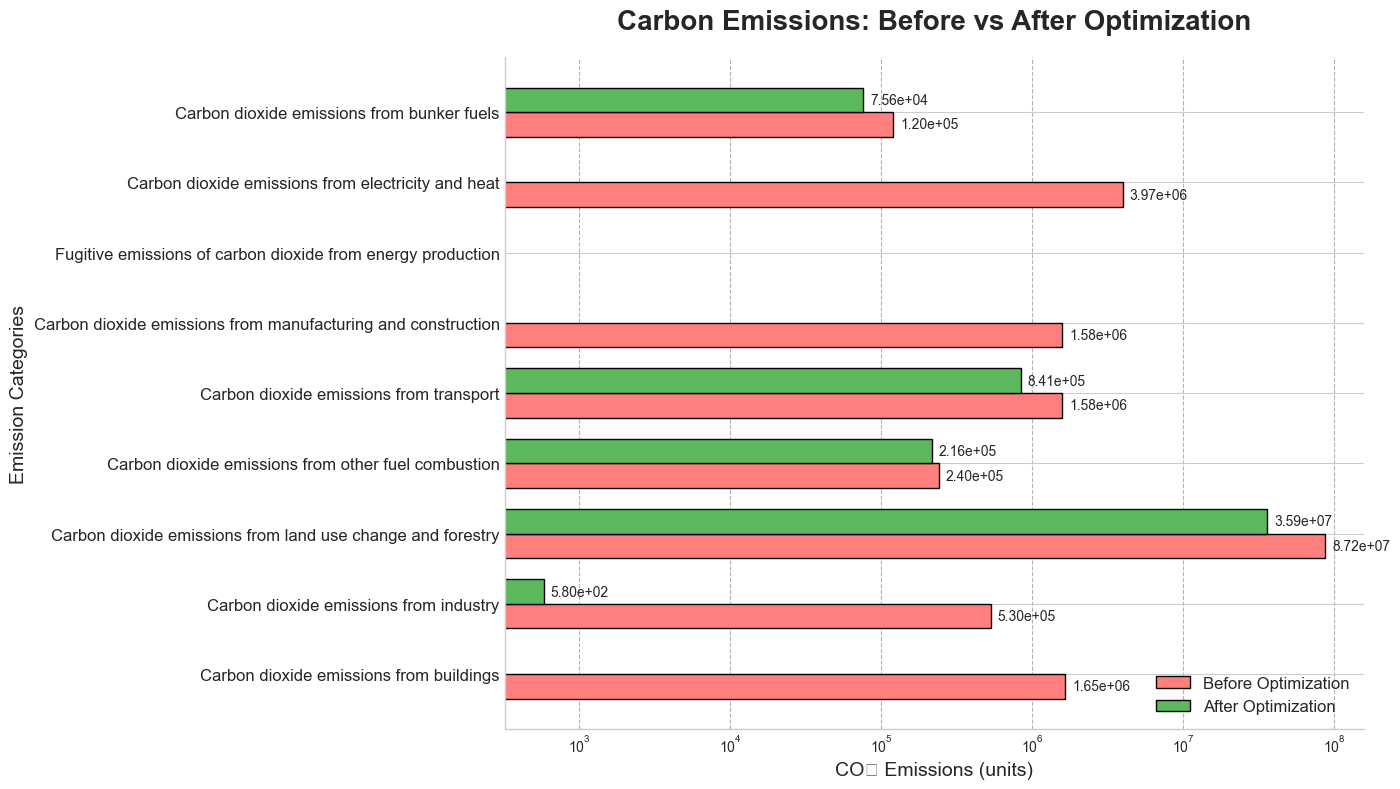

In [115]:
import numpy as np
import matplotlib.pyplot as plt

# Your real data
labels = emission_columns  # Emission categories
before = emissions_data.values[-1]  # Original emissions (latest year)
after = optimized_emissions  # After optimization

# Set plot style
plt.style.use('seaborn-v0_8-whitegrid')

# Setting up bar locations
y = np.arange(len(labels))
height = 0.35  # Thickness of bars

fig, ax = plt.subplots(figsize=(14, 8))

# Bars
rects1 = ax.barh(y - height/2, before, height, label='Before Optimization', color='#FF7F7F', edgecolor='black')
rects2 = ax.barh(y + height/2, after, height, label='After Optimization', color='#5CB85C', edgecolor='black')

# Title and labels
ax.set_title('Carbon Emissions: Before vs After Optimization', fontsize=20, fontweight='bold', pad=20)
ax.set_xlabel('CO₂ Emissions (units)', fontsize=14)
ax.set_ylabel('Emission Categories', fontsize=14)
ax.set_yticks(y)
ax.set_yticklabels(labels, fontsize=12)
ax.legend(fontsize=12, loc='lower right')

# Log scale on x-axis
ax.set_xscale('log')

# Grid styling
ax.xaxis.grid(True, linestyle='--', which='major', color='grey', alpha=0.6)
ax.set_axisbelow(True)

# Remove spines
for spine in ['top', 'right']:
    ax.spines[spine].set_visible(False)

# Data labels on bars
def autolabel_horizontal(rects):
    """Attach a label next to each bar in *rects*."""
    for rect in rects:
        width = rect.get_width()
        ax.annotate(f'{width:.2e}',
                    xy=(width, rect.get_y() + rect.get_height()/2),
                    xytext=(5, 0),  # 5 points horizontal offset
                    textcoords="offset points",
                    ha='left', va='center', fontsize=10)

autolabel_horizontal(rects1)
autolabel_horizontal(rects2)
# Before plotting, replace zero with a very small value for visualization
before = np.where(before == 0, 1e-1, before)
after = np.where(after == 0, 1e-1, after)

# Tight layout
fig.tight_layout()

plt.show()


In [121]:
import numpy as np

def predict_and_optimize(year_input):
    # Step 1: Predict emissions for the given year
    last_known_year = 2021  # assuming your emissions_years is a list/array of years
    year_gap = year_input - last_known_year

    if year_gap <= 0:
        print(f"⚠️ Please enter a future year after {last_known_year}.")
        return

    # Predict emissions
    predicted_emissions_scaled = model.predict(np.array([[year_gap]]))
    predicted_emissions = scaler.inverse_transform(predicted_emissions_scaled).flatten()

    # Step 2: Optimize predicted emissions
    def evaluate_future(individual):
        scaled_emissions = np.multiply(predicted_emissions, individual)
        total_emission = np.sum(scaled_emissions)
        return (total_emission,)

    # Create a temporary toolbox for future evaluation
    future_toolbox = base.Toolbox()
    future_toolbox.register("individual", tools.initRepeat, creator.Individual, lambda: np.random.uniform(0.5, 1.0), n=len(predicted_emissions))
    future_toolbox.register("population", tools.initRepeat, list, future_toolbox.individual)
    future_toolbox.register("mate", tools.cxBlend, alpha=0.5)
    future_toolbox.register("mutate", mutate_and_clip)
    future_toolbox.register("select", tools.selTournament, tournsize=3)
    future_toolbox.register("evaluate", evaluate_future)
    future_toolbox.register("map", map)

    pop_size = 50
    ngen = 40
    cxpb = 0.5
    mutpb = 0.2

    future_population = future_toolbox.population(n=pop_size)

    result_pop, _ = algorithms.eaSimple(future_population, future_toolbox, cxpb=cxpb, mutpb=mutpb, ngen=ngen, verbose=False)

    best_ind = tools.selBest(result_pop, k=1)[0]
    optimized_predicted_emissions = predicted_emissions * best_ind

    # Step 3: Display results
    original_total = np.sum(predicted_emissions)
    optimized_total = np.sum(optimized_predicted_emissions)
    reduction = original_total - optimized_total
    reduction_percent = (reduction / original_total) * 100

    print(f"Year: {year_input}")
    print(f"Predicted Total Emissions: {original_total:.2f} units")
    print(f"Optimized Total Emissions: {optimized_total:.2f} units")
    print(f"Reduction Achieved: {reduction:.2f} units ({reduction_percent:.2f}% reduction)")

    return {
        "year": year_input,
        "predicted_emissions": predicted_emissions,
        "optimized_emissions": optimized_predicted_emissions
    }


In [ ]:
result = predict_and_optimize(2025)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
Year: 2025
Predicted Total Emissions: 10019911680.00 units
Optimized Total Emissions: 3123584910.96 units
Reduction Achieved: 6896326769.04 units (68.83% reduction)


In [126]:
result = predict_and_optimize(2024)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
Year: 2024
Predicted Total Emissions: 9737083904.00 units
Optimized Total Emissions: 4258956162.14 units
Reduction Achieved: 5478127741.86 units (56.26% reduction)


In [127]:
result = predict_and_optimize(2026)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
Year: 2026
Predicted Total Emissions: 10366000128.00 units
Optimized Total Emissions: 5073986587.32 units
Reduction Achieved: 5292013540.68 units (51.05% reduction)


In [129]:
result = predict_and_optimize(2030)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Year: 2030
Predicted Total Emissions: 10936625152.00 units
Optimized Total Emissions: 2232823265.95 units
Reduction Achieved: 8703801886.05 units (79.58% reduction)


In [131]:
result = predict_and_optimize(2040)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Year: 2040
Predicted Total Emissions: 9810221056.00 units
Optimized Total Emissions: 1938366590.14 units
Reduction Achieved: 7871854465.86 units (80.24% reduction)
